<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Андрей, привет!</b>

Меня зовут Владимир Бердников, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении задания.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные комментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать над проектом в диалоге: если ты что-то меняешь вс проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Необходимо добавить вступление (этот пункт есть в блоке курса: Полезные инструкции для учёбы - Оформление проекта - Рекомендации по выполнению проектов):
    	
* заголовок
* краткое описание проекта (желательно своими словами, не копируя из имеющегося описания)
* цель проекта
* описание данных (на усмотрение, данные можно описать в самой работе)
* план работы.

Со вступлением получатель отчета сможет получить общее представление о том, что будет в проекте


# Проект: Статистический анализ данных 

Проект по статистическому анализу данных в котором я представляю аналитика популярного сервиса аренды самокатов. Получены данные о пользователях из нескольких городов и их поездках. Требуется проанализировать данные и проверить гипотезы.

План работы: 
- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчет выручки
- Проверка гипотез
- Работа с распределениями
- Вывод

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше добавил заголовок, краткое описание и план работы

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Хорошо

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, norm
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
pd.options.mode.chained_assignment = None

## Шаг 1. Загрузка данных

In [3]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

try:
    riders = pd.read_csv('/datasets/rides_go.csv')
except:
    riders = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

Первые 5 строк таблицы `users`

In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Информация по датафрейму `users`

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Стоит еще прокомментировать, сколько записей в таблицах, какие в них есть типы данных

Выведу первые строчки таблицы `riders`

In [6]:
riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Информация по датафрейму `riders`

In [7]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


У колонки `date` формат данных `object`, а должен быть `datetime`. Нужно исправить в предобработке данных.

Выведу первые строчки таблицы `subscriptions`

In [8]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Информация по датафрейму `subscriptions`

In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Данных не много, пропущенных значений не выявлено, неверный формат только у даты в таблице `riders`.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

То что выше, было, то что под этим комментарием - это новый, дополненный вывод.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

В исходных данных три таблицы `users`, `riders`, `subscriptions`. 

`users` - таблица с информацией о пользователях, содержит поля: `user_id` с форматом данных `int64`, `name` с форматом данных `object`, `age` с форматом данных `int64`, `city` с форматом данных `object`, `subscription_type` с форматом данных `object`. В таблице 1565 строк.
 
`riders` - таблица с информацией о поездках, содержит поля: `user_id` с форматом данных `int64`, `distance` с форматом данных `float64`, `duration` с форматом данных `float64`, `date` с форматом данных `object`, который нужно будет поменять на `datetime`. В таблице 18068 строк.
 
`subscriptions` - таблица с информацией о подписках, содержит поля: `subscription_type` с форматом данных `object`, `minute_price` с форматом данных `int64`, `start_ride_price` с форматом данных `int64`, `subscription_fee` с форматом данных `int64`. В таблице 2 строки.

## Шаг 2. Предобработка данных

Датафейм `riders`. Изменение формата даты. Добавление колонки с номерами месяца взятого из колонки с датой.

In [10]:
riders['date'] = pd.to_datetime(
    riders['date'], format='%Y-%m-%d')
riders['month'] = pd.DatetimeIndex(riders['date']).month

In [11]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Желательно еще проверить, за какой период имеются данные. Создается столбец с номерами месяцев, если здесь несколько лет, следует это учитывать.

In [12]:
riders['date'].min(), riders['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

Минимальная и максимальная даты. В данных период за один год. Поэтому можно идти дальше.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше добавил расчет периода и комментарий.   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Данные за один год

Формат изменился, колонка с месяцем добавилась.

Проверка на дубликаты. Единственное место где можно выявить дубликаты - это в таблице `users` в колонке `user_id`

In [13]:
users['user_id'].value_counts().head(5)

user_id
209    2
807    2
611    2
43     2
737    2
Name: count, dtype: int64

Дупликаты обнаружены. Лишнее удаляю.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Но лучше вывести количество выявленных дубликатов. И необходимо проверить явные полные дубликаты во второй таблице

In [14]:
users.duplicated().sum()

31

In [15]:
riders.duplicated().sum()

0

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше проверил количество дубликатов в первой и второй таблице.   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Принято

In [16]:
users = users.drop_duplicates()

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


Было 1565 строк, стало 1534. 31 дубликат удален.

## Шаг 3. Исследовательский анализ данных

### Частота встречаемости городов

users['city'].value_counts().plot.bar();

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Для большего удобства при считывании визуализации лучше использовать линейчатую диаграмму (столбчатую диаграмму с горизонтальными столбцами), т.е. повернуть ее на 90 градусов. Это позволит расположить названия городов горизонтально. 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Но не хватает заголовка и подписей на осях. Это замечание актуально для всех визуализаций в этом проекте.

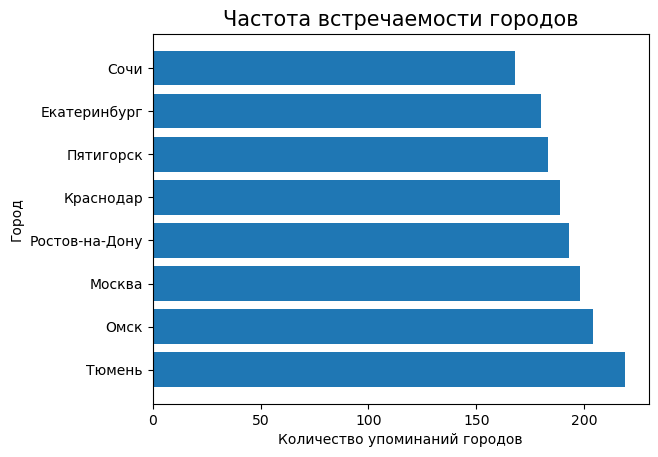

In [18]:
fig, ax = plt.subplots()

ax.barh(users['city'].unique(), users['city'].value_counts())

ax.set_title('Частота встречаемости городов', size = 15)
ax.set_ylabel('Город')
ax.set_xlabel('Количество упоминаний городов')
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше все исправил.   

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Не все визуализации ниже подписаны

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ Принято

In [19]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

В таблице представлено 8 городов. Москва по частоте встречаемости занимает последнее место, Пятигорск - первое. 

### Соотношение пользователей с подпиской и без подписки

users['subscription_type'].value_counts().plot.bar();

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Здесь подошла бы круговая диаграмма, с ее помощью можно показать соотношение двух категорий в процентах. О том, как подписывать диаграмму, есть в документации по [ссылке](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Либо на круговой диаграмме, либо в таблице, либо на указанном графике необходимо добавить подписи в виде процентов/долей, т.к. нужно показать соотношение. 

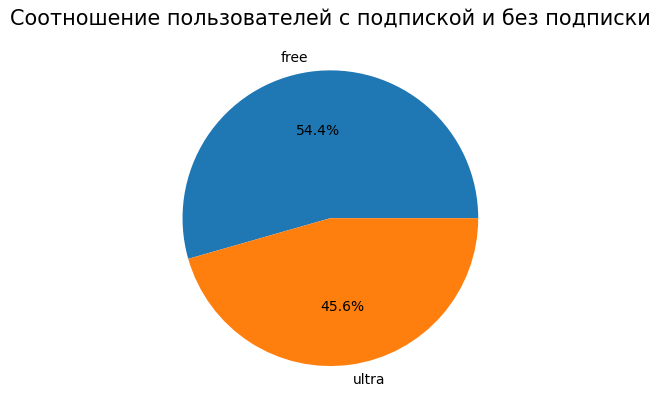

In [20]:
fig, ax = plt.subplots()

ax.pie(users['subscription_type'].value_counts(), labels=['free', 'ultra'], autopct='%1.1f%%')

ax.set_title('Соотношение пользователей с подпиской и без подписки', size = 15)

plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше сделал все как надо.   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

In [21]:
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

Разница в пользователях с подпиской и без в 135 пользователей. Это 16% от 835 или 8.8% от 1534(общее число пользователей с подпиской и без)

### Возраст пользователей

fig, ax = plt.subplots()

ax.hist(users['age'], bins=30, linewidth=0.5, edgecolor="white")
ax.grid()

ax.set_xlabel('age')
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Ниже сделал новый график с подписями осей и графика

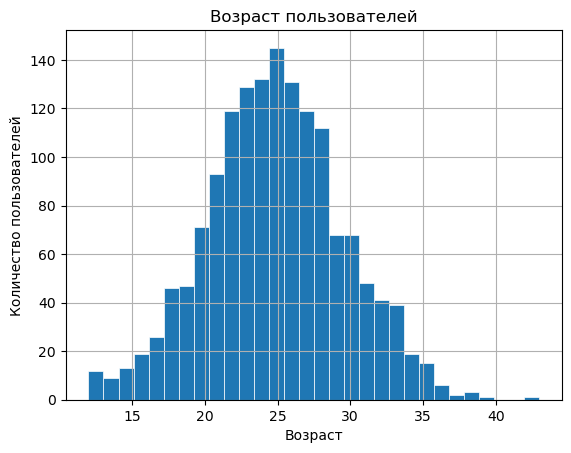

In [22]:
fig, ax = plt.subplots()

ax.hist(users['age'], bins=30, linewidth=0.5, edgecolor="white")
ax.grid()

ax.set_title('Возраст пользователей')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пользователей')
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Не лишним было бы подробнее изучить данные с использованием функции `describe()`. С ее помощью можно увидеть точное минимальное и максимальное значения, определить медиану и среднее, в качестве диапазона часто встречающихся значений для выводов можно выбрать данные от первого до третьего квартиля (25% и 75%). Рекомендация актуальна и для других пунктов (ниже) данного шага.

In [23]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Вывод:

Среднее и медиана почти совпадают. Средний возраст пользователей 25 лет. Чаще всего встречаются пользователи возрастом 22-28 лет. 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше учел комментарий, проанализировал данные через `describe`, написал вывод.   

In [24]:
users['age'].value_counts().head(10)

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
Name: count, dtype: int64

По графику можно определить, что больше всего пользователей с возрастом 25 лет. 2 и 3 место 24 и 26 лет, далее расходится в право и влево почти ровным "колоколом" от 15 до 35 лет. 

### Расстояние, которое пользователь преодолел за одну поездку

fig, ax = plt.subplots()

ax.hist(riders['distance'], bins=50, linewidth=0.5, edgecolor="white")
ax.grid()

ax.set_xlabel('distance')
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Ниже сделал новый график с подписями осей и графика

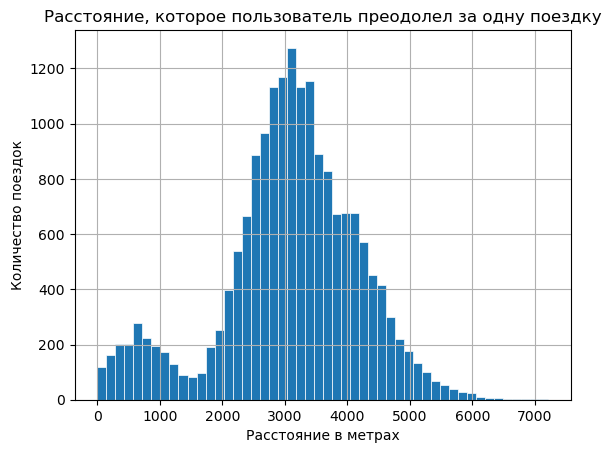

In [25]:
fig, ax = plt.subplots()

ax.hist(riders['distance'], bins=50, linewidth=0.5, edgecolor="white")
ax.grid()

ax.set_title('Расстояние, которое пользователь преодолел за одну поездку')
ax.set_xlabel('Расстояние в метрах')
ax.set_ylabel('Количество поездок')
plt.show()

На графике видны два всплеска, первый слабый на дистанции 500-600 метров, второй - основной на дистанции 3000-3100. Это говорит о том, что пользователи предпочитают использовать этот способ передвижения в основном на эти расстояния. Больше 7 км никто не катается и это значит, что на расстояния больше 7 км пользователи предпочитают другие средства передвижения(такси, общественный наземный и подземный транспорт.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Слева на графике виден небольшой всплеск. Часть клиентов используют самокаты для очень коротких поездок

### Продолжителность поездок

fig, ax = plt.subplots()

ax.hist(riders['duration'], bins=200)
ax.grid()

ax.set_xlabel('duration')
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Ниже сделал новый график с подписями осей и графика

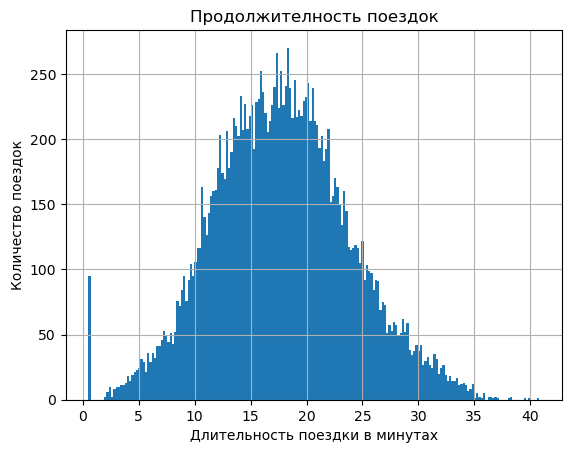

In [26]:
fig, ax = plt.subplots()

ax.hist(riders['duration'], bins=200)
ax.grid()

ax.set_title('Продолжителность поездок')
ax.set_xlabel('Длительность поездки в минутах')
ax.set_ylabel('Количество поездок')
plt.show()

График говорит о том, что среднее время поездок равно 17,5 минутам. Так же есть отдельный всплеск поездок по 1 минуте. Этот график совпадает с графиком по дистанции. Из этого можно предположить, что пользователи берут на минутку самокаты для того, что бы проехать 500-600 метров и на 17.5 минут(в среднем) для поездок на расстояние 3 км(в среднем)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Дополнительно можно посмотреть, есть ли в столбце с продолжительностью сессии аномалии. Можно сравнить продолжительность сессий и расстояние поездок и прокомментировать, насколько реально можно проехать такое расстояние за указанное время. В случае обнаружения удалять не рекомендуется, лучше сначала выяснить причину их появления.

Проверка максимальных значений длительности сессии и и расстояния за сессию.

In [27]:
riders['duration'].max(), riders['distance'].max()

(40.82396261922424, 7211.007744598519)

40 минут и 7211 метров. Можно перевести это в привычные километры в час и понять на сколько это реально и безопасно.

In [28]:
riders['distance'].max() / 1000 * 60 / riders['duration'].max()

10.598198629355222

Получилось 10.5 км/ч. Не так много и вполне реалистично.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Учел коментарий и провел расчет с описанием выше.

## Шаг 4. Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [29]:
general = users.merge(riders, on='user_id', how='outer')

In [30]:
general = general.merge(subscriptions, on='subscription_type', how='outer')

In [31]:
general.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
17226,603,Дарья,25,Пятигорск,ultra,3927.915878,32.424996,2021-11-06,11,6,0,199
8885,1345,Даниэль,26,Екатеринбург,free,265.535608,6.758673,2021-10-08,10,8,50,0
8030,1282,Тамара,32,Ростов-на-Дону,free,2626.327266,18.851289,2021-04-11,4,8,50,0
9430,1384,Анатолий,22,Москва,free,2537.296295,16.874127,2021-10-01,10,8,50,0
14010,260,Игнат,24,Екатеринбург,ultra,2487.942003,9.490283,2021-09-08,9,6,0,199
3967,990,Елена,23,Сочи,free,3633.051979,23.899156,2021-04-10,4,8,50,0
12220,71,Тимур,31,Сочи,ultra,763.907700,15.696145,2021-06-25,6,6,0,199
3698,971,Александр,21,Екатеринбург,free,3571.797625,18.937328,2021-11-16,11,8,50,0
16818,564,Ника,31,Тюмень,ultra,2801.463154,12.308165,2021-07-07,7,6,0,199
1927,843,Мирослава,23,Сочи,free,2648.642291,16.348149,2021-05-28,5,8,50,0


Объединение прошло успешно, все данные теперь в одной таблице.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ После объединения стоит проверить и написать, прошло ли оно корректно, не были ли потеряны данные или не появились ли лишние записи. Совпадает ли количество записей с одной из исходных таблиц? Имеются ли пропуски? Стоит не только объединить данные, но и убедиться, что всё хорошо.

In [32]:
general.info()
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB
<class 'pandas.core.frame.Data

Сравнение новой таблицы с большей по объему из исходных показало, что количество строк совпадает, пропущенных данных нет, форматы не поменялись. Объединение прошло успешно.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше проверил, что все прошло хорошо, вывод написал.   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Объединение прошло успешно

### Создание двух датафреймов из датафрейма, созданного на этапе 4.1

#### C данными о пользователях без подписки

In [33]:
subscription_off = general[general['subscription_type'] == 'free']

In [34]:
subscription_off.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
5,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
7,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
8,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
9,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


#### C данными о пользователях с подпиской

In [35]:
subscription_on = general[general['subscription_type'] == 'ultra']

In [36]:
subscription_on.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
13303,187,Михаил,28,Пятигорск,ultra,4537.639477,25.015198,2021-11-06,11,6,0,199
12819,134,Людмила,28,Москва,ultra,2689.928934,14.724822,2021-12-05,12,6,0,199
14112,270,Егор,26,Тюмень,ultra,4151.088943,14.224642,2021-01-08,1,6,0,199
17390,620,Мелания,21,Екатеринбург,ultra,2849.043979,27.245220,2021-02-13,2,6,0,199
13404,198,Марсель,27,Сочи,ultra,3632.046268,21.716911,2021-09-21,9,6,0,199


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Отлично, созданы необходимые датафреймы. Я бы еще соватовал проверять, что совокупный размер датафреймов совпадает с количеством строк в исходной таблице.

### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

#### График с расстояниями пользователей с подпиской и без

fig, ax = plt.subplots()

ax.hist(subscription_off['distance'], bins=50, linewidth=0.5, edgecolor="white", label='free')
ax.hist(subscription_on['distance'], bins=50, linewidth=0.5, edgecolor="white", label='ultra', alpha=0.6)


ax.grid()
ax.set_title('distance')
ax.legend()

plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Ниже сделал новый график с подписями осей и графика

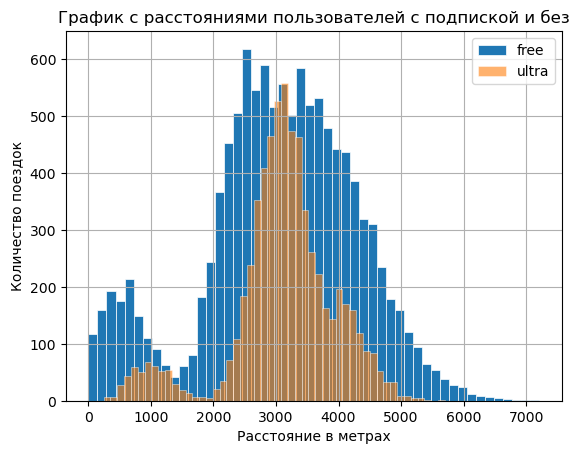

In [37]:
fig, ax = plt.subplots()

ax.hist(subscription_off['distance'], bins=50, linewidth=0.5, edgecolor="white", label='free')
ax.hist(subscription_on['distance'], bins=50, linewidth=0.5, edgecolor="white", label='ultra', alpha=0.6)


ax.grid()
ax.set_title('График с расстояниями пользователей с подпиской и без')
ax.set_ylabel('Количество поездок')
ax.set_xlabel('Расстояние в метрах')
ax.legend()

plt.show()

Пользователи с подпиской обозначены ораньжевым цветом, а без подписки - синим. Видно, что пользователей без подписки больше. Среднее значение у них совпадает и лежит на расстоянии в 3000 метров. При этом у пользователей без подписки дисперсия больше за счет количества самих пользователей. 

Есть разница в коротких поездках. Пользовтели с подпиской в "короткой" поездке в среднем проезжают 500 метров, а пользователи с подпиской - 1000 метров.

#### График с длительностью поездки пользователей с подпиской и без

fig, ax = plt.subplots()

ax.hist(subscription_off['duration'], bins=50, linewidth=0.5, edgecolor="white", label='free')
ax.hist(subscription_on['duration'], bins=50, linewidth=0.5, edgecolor="white", label='ultra', alpha=0.6)


ax.grid()
ax.set_title('duration')
ax.legend()

plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Ниже сделал новый график с подписями осей и графика

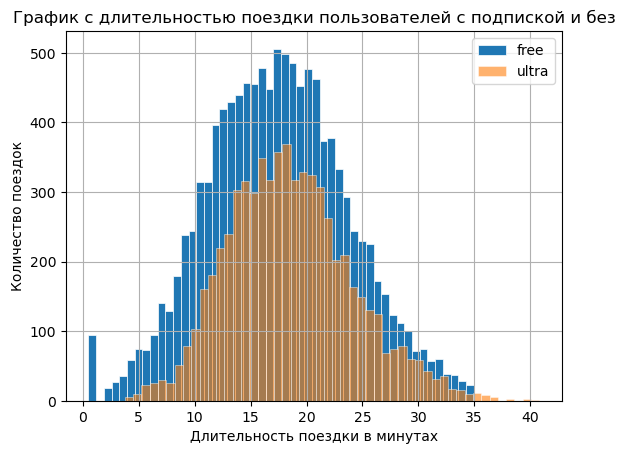

In [38]:
fig, ax = plt.subplots()

ax.hist(subscription_off['duration'], bins=50, linewidth=0.5, edgecolor="white", label='free')
ax.hist(subscription_on['duration'], bins=50, linewidth=0.5, edgecolor="white", label='ultra', alpha=0.6)


ax.grid()
ax.set_title('График с длительностью поездки пользователей с подпиской и без')
ax.set_ylabel('Количество поездок')
ax.set_xlabel('Длительность поездки в минутах')
ax.legend()

plt.show()

Здесть так же видна превышающая масса пользователей без подписки(синий цвет).

Пользователи с подпиской заканчивают аренду раньше 4 минут в отличие от пользователей без подписки, около 100 сессий пользователей без подписки не была дольше 2 минут.

Пользователи с подпиской имеют сессии дольше 35 минут, а у пользователей без подписки таких нет. Возможно это обусловлено условиями самого сервиса.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Здорово, что есть сравнение пользователей из двух групп. Также можно использовать функцию `describe()` на этом шаге для более подробного аналаза.

In [39]:
subscription_off[subscription_off['duration'] > 35]

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee


## Шаг 5. Подсчёт выручки

### Датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Поиск суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.

users_total = (pd.concat([subscription_on.
                          pivot_table(index=('user_id', 'month'), 
                                      values=('duration', 'distance'), 
                                      aggfunc='sum').
                          merge(subscription_on.
                                pivot_table(index=('user_id', 'month'), 
                                      values='name', 
                                      aggfunc='count'), on=['user_id','month'], how='outer'),
                          subscription_off.
                          pivot_table(index=('user_id', 'month'), 
                                      values=('duration', 'distance'), 
                                      aggfunc='sum').
                                merge(subscription_off.pivot_table(index=('user_id', 'month'), 
                                      values='name', 
                                      aggfunc='count'), on=['user_id','month'], how='outer')])
              )

users_total = users_total.rename(columns={'name':'count',}).reset_index()
users_total['duration'] = np.ceil(users_total['duration']).astype('int')

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Округлять до следующего целого необходимо до создания таблицы с агрегированными данными. В задании написано: "Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа". Именно исходного, а не только что созданного. Округлять продолжительность каждой поездки, а не результат суммирования.

general['duration'] = np.ceil(general['duration']).astype('int')

users_total = (pd.concat([subscription_on.
                          pivot_table(index=('user_id', 'month'), 
                                      values=('duration', 'distance'), 
                                      aggfunc='sum').
                          merge(subscription_on.
                                pivot_table(index=('user_id', 'month'), 
                                      values='name', 
                                      aggfunc='count'), on=['user_id','month'], how='outer'),
                          subscription_off.
                          pivot_table(index=('user_id', 'month'), 
                                      values=('duration', 'distance'), 
                                      aggfunc='sum').
                                merge(subscription_off.pivot_table(index=('user_id', 'month'), 
                                      values='name', 
                                      aggfunc='count'), on=['user_id','month'], how='outer')])
              )

users_total = users_total.rename(columns={'name':'count',}).reset_index()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Учел коментарий. Ячейки со старым кодом по созданию таблицы перевел в `Markdown`. Новый код написал выше. Сначала в исходной собранной таблице округлил каждое значение длительности и после начал создание агрегированной таблицы. 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Но округление не затронуло сводную таблицу

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Исправил ниже. Старый код перевел в `Markdown`

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ Отлично

In [40]:
subscription_on.loc[:,'duration'] = np.ceil(subscription_on.loc[:,'duration']).astype('int')
subscription_off.loc[:,'duration'] = np.ceil(subscription_off.loc[:,'duration']).astype('int')

In [41]:
users_total = (pd.concat([subscription_on.
                          pivot_table(index=('user_id', 'month'), 
                                      values=('duration', 'distance'), 
                                      aggfunc='sum').
                          merge(subscription_on.
                                pivot_table(index=('user_id', 'month'), 
                                      values='name', 
                                      aggfunc='count'), on=['user_id','month'], how='outer'),
                          subscription_off.
                          pivot_table(index=('user_id', 'month'), 
                                      values=('duration', 'distance'), 
                                      aggfunc='sum').
                                merge(subscription_off.pivot_table(index=('user_id', 'month'), 
                                      values='name', 
                                      aggfunc='count'), on=['user_id','month'], how='outer')])
              )

users_total = users_total.rename(columns={'name':'count',}).reset_index()

In [42]:
users_total.head(10) 

,user_id,month,distance,duration,count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
5,1,12,6751.629942,28.0,2
6,2,3,10187.723006,63.0,3
7,2,4,6164.381824,40.0,2
8,2,6,3255.338202,14.0,1
9,2,7,6780.722964,48.0,2


In [43]:
users_total = users.merge(users_total, on='user_id', how='left')
users_total = users_total.merge(subscriptions, on='subscription_type', how='outer')
users_total

,user_id,name,age,city,subscription_type,month,distance,duration,count,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,1,2515.690719,15.0,1,8,50,0
1,700,Айдар,22,Омск,free,2,13446.659764,89.0,5,8,50,0
2,700,Айдар,22,Омск,free,3,3798.334905,19.0,1,8,50,0
3,700,Айдар,22,Омск,free,4,2984.551206,16.0,1,8,50,0
4,700,Айдар,22,Омск,free,6,5927.650988,29.0,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,699,Оксана,22,Москва,ultra,6,4072.797406,17.0,1,6,0,199
11327,699,Оксана,22,Москва,ultra,8,7018.324143,45.0,2,6,0,199
11328,699,Оксана,22,Москва,ultra,9,6364.861911,31.0,2,6,0,199
11329,699,Оксана,22,Москва,ultra,10,4707.845501,16.0,1,6,0,199


### Добавление столбца с помесячной выручкой, которую принёс каждый пользователь.

Столбец будет назван `revenue` - выручка.

In [44]:
users_total['revenue'] = (users_total['subscription_fee']
                          + (users_total['start_ride_price'] * 2)
                          + (users_total['minute_price'] * users_total['duration'])
                         )

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Выручка рассчитана неверно. Кое-что в формуле выше неправильно. В подсказке написано: "стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки"

In [45]:
users_total['revenue'] = ((users_total['start_ride_price'] * users_total['count'])
                          + (users_total['minute_price'] * users_total['duration'])
                          + users_total['subscription_fee']
                         )

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Изменил формулу расчета. Ячейку со старым кодом перевел в `Markdown`.

In [46]:
users_total.sample(5)

,user_id,name,age,city,subscription_type,month,distance,duration,count,minute_price,start_ride_price,subscription_fee,revenue
10410,553,Назар,31,Тюмень,ultra,12,5534.002002,37.0,2,6,0,199,421.0
6655,1519,Ирина,25,Тюмень,free,3,7685.038878,40.0,2,8,50,0,420.0
6115,1452,Людмила,33,Омск,free,6,426.413660,7.0,1,8,50,0,106.0
6322,1478,Роберт,21,Пятигорск,free,12,8655.497475,47.0,3,8,50,0,526.0
4351,1236,Александр,31,Екатеринбург,free,8,8746.518388,45.0,2,8,50,0,460.0


## Шаг 6. Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

H0: Общая продолжительность поездок пользователей с подпиской равно общей продолжительности поездок пользователей без подписки

H1: Общая продолжительность поездок пользователей с подпиской больше общей продолжительности поездок пользователей без подписки

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Какой именно параметр сравнивается? Среднее, дисперсия или еще что-нибудь? Стоит дописать в формулировки гипотез. Ниже также лучше дополнить гипотезы.

Здесь происходит сравнение средних значений генеральных совокупностей. Пользователей с подпиской и пользователей без подписки.

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

H0: Средние значения продолжительности поездок пользователей с подпиской и без равны 

H1: Среднее значение продолжительности поездок пользователей с подпиской больше среднего значения продолжительности поездок пользователей без подписки.

Если нулевая гипотеза не будет отвергнута, то можно сказать следующее: нельзя утверждать, что пользователи с подпиской тратя больше времени на поездки.
Если нулевая гипотеза будет отвергнута, то можно утверждать, что пользователи с подпиской тратят больше времени на поездки

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше сформулировал гипотезы и описание к ним более точно.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Принято

alpha = 0.05

results = st.ttest_ind(subscription_off['duration'], subscription_on['duration'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Но порядок выборок в тесте должен быть, как в альтернативной гипотезе. Сначала в гипотезе указано free или ultra?

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Верно

In [47]:
alpha = 0.05

results = st.ttest_ind(
    subscription_on['duration'], 
    subscription_off['duration'], 
    alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Ответ:

Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о том, что средние значения продолжительности поездок пользователей с подпиской и без равны. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки, чем пользовтели без подписки.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Выше изменил формулу расчета. Ячейку со старым кодом перевел в `Markdown`. Написал новый ответ.

В результате проверки выявлено, что нулевую гипотезу нельзя отвергать с вероятностью 100%, что значит:

Общая продолжительность поездок пользователей с подпиской равно общей продолжительности поездок пользователей без подписки

Пользователи с подпиской тратят столько же времени на поездки, сколько тратят пользователи без подписки.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Лучше написать так: "Нулевая гипотеза (о чем?) отвергнута, есть основания утверждать, что..."

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

H0: Среднее растояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров

H1: Среднее растояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Следует обратить внимание, что бизнес заинтересован в том, чтобы издержки были минимальные. Чем меньше износ, тем лучше. Подсчитано, что 3130 метров оптимально с точки зрения износа, т.е. всё, что равно этому расстоянию или меньше вполне приемлемо. Но нужно же выяснить, выходит ли за пределы оптимальности износ самокатов. Стоит переформулировать альтернативную гипотезу и скорректировать параметр alternative. И прокомментировать результаты, является ли расстояние поездок оптимальным с точки зрения износа самоката, т.е., что он в пределах нормы, не завышен.


alpha = 0.05

results = st.ttest_1samp(
    subscription_on['distance'], 
    subscription_on['distance'].mean(),
      alternative='less')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу, что означает вероятность 50% того, что:

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.

Вывод:

Нельзя сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Очень хотелось придерживаться формулировки в задании, что бы не ошибиться. Но твоя логика более чем оправдана и применима в жизни.
Изменил формулу расчета. Ячейку со старым кодом перевел в `Markdown`.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Выше формулировки были подходящими, только альтернативную гипотезу нужно было скорректировать. И сравнивается с 3130 м, как сформулировано в задании, а не средним расстоянием из выборки

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

Нужно определить явлется ли среднее значение генеральной совокупности больше заданного числа. Тоесть больше ли 3130 метров среднее расстояние, которое проезжают пользователи с подпиской за одну поездку.

H0: Среднее генеральной совокупности равно заданному числу

H1: Среднее генеральной совокупности больше заданного числа

Это значит, что если нулевая гипотеза отвергается, то среднее расстояние за поездку больше 3130 метров и стоит задуматься о повышенном износе самокатов. А если нулевая гипотеза не отвергается, то за самокаты можно не переживать.


alpha = 0.05

results = st.ttest_1samp(
    subscription_on['distance'], 
    subscription_on['distance'].mean(),
      alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Ниже добавил исправленные формулировки гмпотез и исправленый код, где сравнивается с 3130 м.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ Да, верно

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

H0: Среднее растояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров

H1: Среднее растояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров

In [48]:

alpha = 0.05
safety_distance = 3130

results = st.ttest_1samp(
    subscription_on['distance'], 
    safety_distance,
      alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, а значит за самокаты можно не переживать!

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

H0: Помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки

H1: Помесячная выручка от пользователей с подпиской по месяцам больше помесячной выручки от пользователей без подписки

In [49]:
alpha = 0.05

results = st.ttest_ind(
    users_total[users_total['subscription_type'] == 'ultra']['revenue'], 
    users_total[users_total['subscription_type'] == 'free']['revenue'],
      alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Статтест выбран правильно.

Нулевая гипотеза не подтвердилась

Вывод:

Помесячная выручка от пользователей с подпиской по месяцам больше помесячной выручки от пользователей без подписки.

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Подходит тест st.ttest_rel(). Но в задании еще написано: "Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось". Какая должна быть гипотеза, односторонняя или двухсторонняя?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ниже расписал все подробнее.

Формулировка нулевой(H0) и альтернативной(H1) гипотезы.

H0: Средние совокупности двух зависимых выборок равны. Это значит, что количество обращение в техподдержку не изменилось после обновления сервера.

H1: Средняя совокупность после указанной даты меньше средней совокупности до этой даты. Это значит, что количество обращений после обновления сервера снизилось.

для проверки этой односторонней гипотезы лучше применить метод `scipy.stats.ttest_rel()` с аргументом `alternative='less'`

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Хорошо

## Шаг 7. Распределения

### Акция с раздачей промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

H0: Вероятность, что подписку продлят 100 клиентов равна 5 %

H1: Вероятность, что подписку продлят 100 клиентов меньше 5 %

вероятность не выполнить план примерно 5% - это вероятность 5%, что подписку продлят меньше 100 клиентов

n = 1200 
p = 0.1 

alpha = 0.05

mu = n * p 
sigma = (n * p * (1 - p)) ** 0.5 

distr = st.norm(mu, sigma) 

result = distr.cdf(100) 
print('Вероятность, что подписку продлят 100 клиентов', result)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ st.norm - это нормальное распределение, а не биноминальное. Один из вариантов решения, чтобы рассчитать минимальное количество промокодов, -  в цикле выбрать какое-нибудь количество промокодов (n) и увеличивать его на единицу, пока binom.cdf не станет равным или меньше 0.05 (в аргументах функции cdf стоит указать 99, n и p). 99 выбирается, т.к. нужно найти такое минимальное значение, чтобы вероятность не выполнить план (меньше 100) была равна 0.05. 

График с нормальным распрпеделением

p = 0.1
n = 1200

left = int(n * p - 4 * ((n * p * (1 - p)) ** 0.5))
right = int(n * p + 4 * ((n * p * (1 - p)) ** 0.5))

x = list(range(max(0, left), right))

ax = plt.subplot()

ax.plot(x, binom.pmf(x, n, p))
ax.grid()
plt.show()


Ответ: Что бы подписку продлили 100 клиентов нужно раздать 1200 промокодов


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ниже собрал новое решение с циклом по перебору значений `n`

In [50]:
n = 1000 
p = 0.1 

alpha = 0.05
 

dist = st.binom(n, p)

result = dist.cdf(100) 

while result > alpha:
    if n > 3000:
        print('stop', result)
        break
    dist = st.binom(n, p)
    result = dist.cdf(100) 
    n += 1
    
else:
    print('Что бы подписку продлили 100 клиентов, нужно разослать', n, 'промокодов')

Что бы подписку продлили 100 клиентов, нужно разослать 1173 промокодов


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Как я выше писал, должно быть не 100, а 99. И на одну единицу результат получился больше, чем должно быть

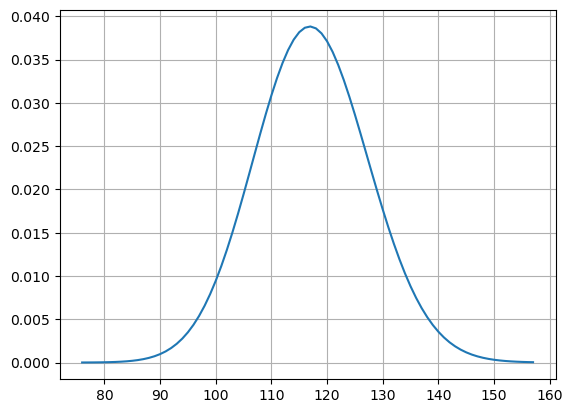

In [51]:
n = 1173
p = 0.1

left = int(n * p - 4 * ((n * p * (1 - p)) ** 0.5))
right = int(n * p + 4 * ((n * p * (1 - p)) ** 0.5))

x = list(range(max(0, left), right))

ax = plt.subplot()

ax.plot(x, binom.pmf(x, n, p))
ax.grid()
plt.show()

### Push-уведомления

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

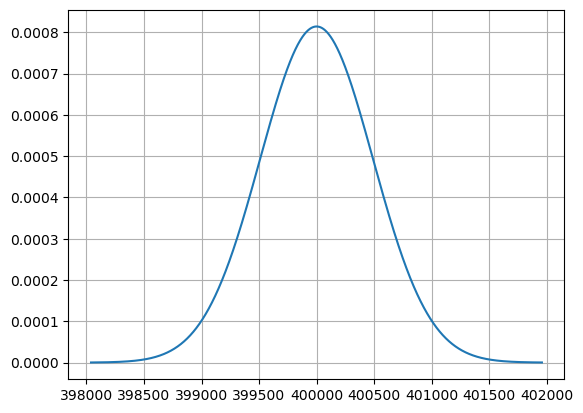


Ответ: Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768



In [52]:
n = 1000000 
p = 0.4 

left = int(n * p - 4 * ((n * p * (1 - p)) ** 0.5))
right = int(n * p + 4 * ((n * p * (1 - p)) ** 0.5))

x = list(range(max(0, left), right))

ax = plt.subplot()

ax.plot(x, binom.pmf(x, n, p))
ax.grid()
plt.show()

mu = n * p 
sigma = (n * p * (1 - p)) ** 0.5 

distr = st.norm(mu, sigma) 

result = distr.cdf(399500) 
print()
print('Ответ: Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей:', result)
print()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Верно

## Вывод

Данные были получены без потерь; 

В данных присутствовали дубликаты, которые были удалены;

Формат даты совершения поздки был записан в неверном формате, который был изменен;

Добавлена колонка с месяцами в которых были совершены поездки;

Построены графики и изучены:
 - Частота встречаемости городов, где Пятигорск на первом месте, Москва на последнем;
 - Соотношение пользователей с подпиской и без подписки, где пользователей без подписки больше на 8.8% от общего количества подписчиков
 - Возраст пользователей, где средний возраст 25 лет, а возраст всех от детей младше 15 лет до 45 лет;
 - Расстояние, которое пользователь преодолел за одну поездку, где среднее 3 км, максимум 7 км и есть небольшой пик коротких поездок 500м;
 - Продолжителность поездок, где среднее 17.5 минут и так же есть всплеск на коротких сессиях около 1 минуты;

Создана новая таблица с объединенными данными из трех исходных таблиц;

На базе объедененной таблицы созданы две таблицы с пользователями с подпиской и без соответственно;

Созданы графики с длительностью сессии и расстоянием. которое пользователь проехал за сессиию для двух категорий пользователей;

Создан датафрейм, где собраны данные пользователей по расстоянию и длительности поездок разделенные по месяцам и условия тарифа подписки;

В этот датафрейм добавлена колонка с общей выручкой клиента за месяц;

Это все помогло подготовить данные для проверки следующих гипотез:
- Тратят ли пользователи с подпиской больше времени на поездки? Ответ: нет
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Ответ: нет
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Ответ: да

В задачах по распределению получены ответы:
- Что бы подписку продлили 100 клиентов нужно раздать 1200 промокодов;
- Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей при отправленных 1000000 уведомлений: 15.37 %

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет обновить после внесения изменений в проекте, добавить, какие результаты получены в шаге 4. Также стоит резюмировать, являются ли пользователи с подпиской более выгодными для сервиса аренды самокатов?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ниже добавил новый исправленный вывод.   

Данные были получены без потерь; 

В данных присутствовал 31 дубликат. Все дубликаты были удалены;

Формат даты совершения поздки был записан в неверном формате, который был изменен;

Добавлена колонка с месяцами в которых были совершены поездки;

Построены графики и изучены:
 - Частота встречаемости городов, где Пятигорск на первом месте, Москва на последнем;
 - Соотношение пользователей с подпиской и без подписки, где пользователей без подписки больше на 8.8% от общего количества подписчиков
 - Возраст пользователей, где средний возраст 25 лет. Чаще всего встречаются пользователи возрастом 22-28 лет.;
 - Расстояние, которое пользователь преодолел за одну поездку, где среднее 3 км, максимум 7 км и есть небольшой пик коротких поездок 500м;
 - Продолжителность поездок, где среднее 17.5 минут и так же есть всплеск на коротких сессиях около 1 минуты;

Создана новая таблица с объединенными данными из трех исходных таблиц;

На базе объедененной таблицы созданы две таблицы с пользователями с подпиской и без соответственно;

Созданы графики с длительностью сессии и расстоянием. которое пользователь проехал за сессиию для двух категорий пользователей;

Создан датафрейм, где собраны данные пользователей по расстоянию и длительности поездок разделенные по месяцам и условия тарифа подписки;

В этот датафрейм добавлена колонка с общей выручкой клиента за месяц;

Это все помогло подготовить данные для проверки следующих гипотез:
- Тратят ли пользователи с подпиской больше времени на поездки? Ответ: да
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Ответ: да
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Ответ: да

В задачах по распределению получены ответы:
- Что бы подписку продлили 100 клиентов нужно раздать 1173 промокода;
- Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей при отправленных 1000000 уведомлений: 15.37 %

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_1:</span>
    
У тебя хорошая работа! Cоблюдена структура, проделана бóльшая часть проекта, но есть замечания, которые необходимо доработать:
* добавить вступление
* оформить визуализации
* пп. в 3, 4, 5 и 6 шагах
* обновить и дополнить итоговые выводы
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_2:</span>
    
Доработать:
* оформить визуализации
* пп. в 5 и 6 шагах
   
Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_3:</span>
    
Спасибо за доработанные замечания! Проект принят. В дополнение по данной [ссылке](https://allatambov.github.io/psms/pdf/hypo-test.pdf) можно ознакомиться с очень понятной краткой теорией по проверке гипотез.
    
Успехов в дальнейшем обучении!)